In [24]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [25]:
clf.predict([[2., 2.]])  #the model can then be used to predict the class of samples

array([1])

In [28]:
clf.predict_proba([[0., 2.]]) # the probability of each class can be predicted, which is the fraction of training samples of the same class in a leaf:

array([[1., 0.]])

In [4]:
clf.predict([[0., 1.]])

array([1])

In [15]:
from sklearn import datasets
from sklearn import tree
iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
y = iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(170.9,205.737,'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(144.608,168.33,'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(197.192,168.33,'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(105.169,130.923,'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(52.5846,93.5167,'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(26.2923,56.11,'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(78.8769,56.11,'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(157.754,93.5167,'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(131.462,56.11,'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(184.046,56.11,'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(157.754,18.7033,'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(210.338,18.7033,'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(289.215,130.923,'X[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [

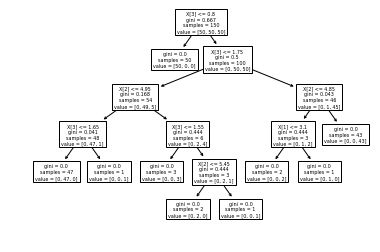

In [16]:
tree.plot_tree(clf.fit(X, y)) 

In [17]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

'iris.pdf'

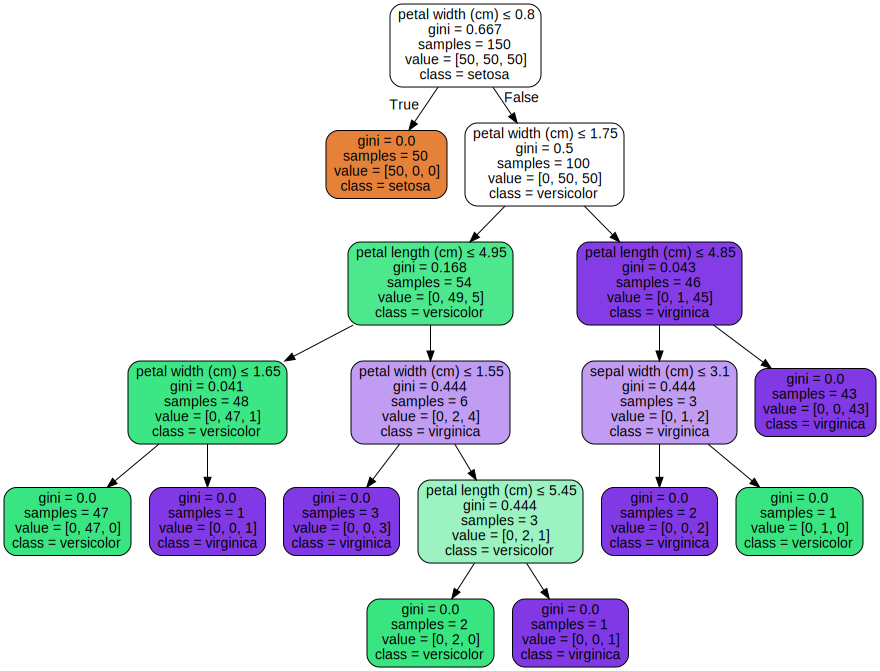

In [18]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names,  class_names=iris.target_names,  filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree.export import export_text
r = export_text(clf, feature_names=iris['feature_names'])
print(r)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



# regression

Automatically created module for IPython interactive environment


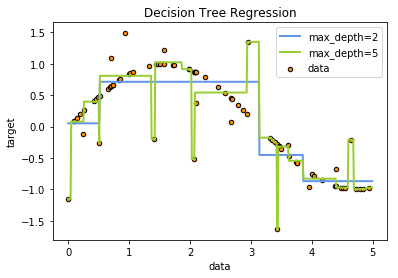

In [29]:
print(__doc__)

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()